In [1]:
# Import the usual libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Enable inline plotting at lower left
%matplotlib inline


In [2]:
import os

# Progress bar
from tqdm.auto import trange, tqdm

In [3]:
from webbpsf_ext.imreg_tools import get_files, get_detname
from webbpsf_ext.analysis_tools import nrc_ref_info

from spaceKLIP import database, coron1pipeline, coron2pipeline

In [4]:
pid = 1411
obsids = [26]

mast_dir = os.getenv('JWSTDOWNLOAD_OUTDIR')
output_dir = os.path.join(mast_dir, f'{pid:05d}_proc')

db = database.create_database(output_dir, pid, obsids=obsids)

[spaceKLIP.database:INFO] --> Identified 5 concatenation(s)
[spaceKLIP.database:INFO]   --> Concatenation 1: JWST_NIRCAM_NRCALONG_F250M_MASKRND_MASK335R_SUB320A335R
TYPE  EXP_TYPE DATAMODL TELESCOP ... BUNIT      ROLL_REF     BLURFWHM
---- --------- -------- -------- ... ----- ----------------- --------
 REF NRC_CORON   STAGE0     JWST ...    DN 76.39355932619398      nan
 REF NRC_CORON   STAGE0     JWST ...    DN 76.39348561381907      nan
 REF NRC_CORON   STAGE0     JWST ...    DN 76.39349303185627      nan
 REF NRC_CORON   STAGE0     JWST ...    DN 76.39344245278461      nan
 REF NRC_CORON   STAGE0     JWST ...    DN 76.39346634929649      nan
[spaceKLIP.database:INFO]   --> Concatenation 2: JWST_NIRCAM_NRCALONG_F300M_MASKRND_MASK335R_SUB320A335R
TYPE  EXP_TYPE DATAMODL TELESCOP ... BUNIT      ROLL_REF     BLURFWHM
---- --------- -------- -------- ... ----- ----------------- --------
 REF NRC_CORON   STAGE0     JWST ...    DN 76.39348148089597      nan
 REF NRC_CORON   STAGE0     JW

In [5]:
db.summarize()

NIRCAM_F250M_MASK335R
	STAGE0: 5 files;	0 SCI, 5 REF
NIRCAM_F300M_MASK335R
	STAGE0: 5 files;	0 SCI, 5 REF
NIRCAM_F335M_MASK335R
	STAGE0: 5 files;	0 SCI, 5 REF
NIRCAM_F335M_MASK335R
	STAGE0: 1 files;	0 SCI, 0 REF, 1 TA
NIRCAM_F444W_MASK335R
	STAGE0: 5 files;	0 SCI, 5 REF


In [7]:
coron1pipeline.run_obs(db, subdir='stage1_nofcorr', quiet=False,
                       remove_fnoise=False)

[spaceKLIP.coron1pipeline:INFO] --> Concatenation JWST_NIRCAM_NRCALONG_F250M_MASKRND_MASK335R_SUB320A335R
[spaceKLIP.coron1pipeline:INFO]   --> Coron1Pipeline: skipping already processed file jw01411026001_03103_00001_nrcalong_uncal.fits
[spaceKLIP.coron1pipeline:INFO]   --> Coron1Pipeline: skipping already processed file jw01411026001_03103_00002_nrcalong_uncal.fits
[spaceKLIP.coron1pipeline:INFO]   --> Coron1Pipeline: skipping already processed file jw01411026001_03103_00003_nrcalong_uncal.fits
[spaceKLIP.coron1pipeline:INFO]   --> Coron1Pipeline: skipping already processed file jw01411026001_03103_00004_nrcalong_uncal.fits
[spaceKLIP.coron1pipeline:INFO]   --> Coron1Pipeline: skipping already processed file jw01411026001_03103_00005_nrcalong_uncal.fits
[spaceKLIP.coron1pipeline:INFO] --> Concatenation JWST_NIRCAM_NRCALONG_F300M_MASKRND_MASK335R_SUB320A335R
[spaceKLIP.coron1pipeline:INFO]   --> Coron1Pipeline: skipping already processed file jw01411026001_03105_00001_nrcalong_uncal.f

In [ ]:
coron2pipeline.run_obs(db, subdir='stage2', quiet=True, 
                       overwrite=False, do_rates=False)

In [6]:
from spaceKLIP.coron1pipeline import run_single_file
from webbpsf_ext import robust
matplotlib.rcParams.update({'font.size': 8})

In [7]:
pid = 1411
obsids = [26]

mast_dir = os.getenv('JWSTDOWNLOAD_OUTDIR')
output_dir = os.path.join(mast_dir, f'{pid:05d}_proc')

db = database.create_database(output_dir, pid, obsids=obsids, verbose=False)


# Cycle through all obsids and get the files in a single list
input_dir = os.path.join(mast_dir, f'{pid:05d}')
fitsfiles = [get_files(input_dir, pid, obsid=oid) for oid in obsids]
fitsfiles = [f for sublist in fitsfiles for f in sublist]
datapaths = [os.path.join(input_dir, f) for f in fitsfiles]

In [13]:
datapaths[6]

'/Users/jarron/data/MAST/01411/jw01411026001_03105_00001_nrcalong_uncal.fits'

In [14]:
res1 = run_single_file(datapaths[3], output_dir, return_rateints=True,
                       remove_fnoise=False, save_results=False)

In [15]:
res1.shape

(8, 320, 320)

  0%|          | 0/8 [00:00<?, ?it/s]

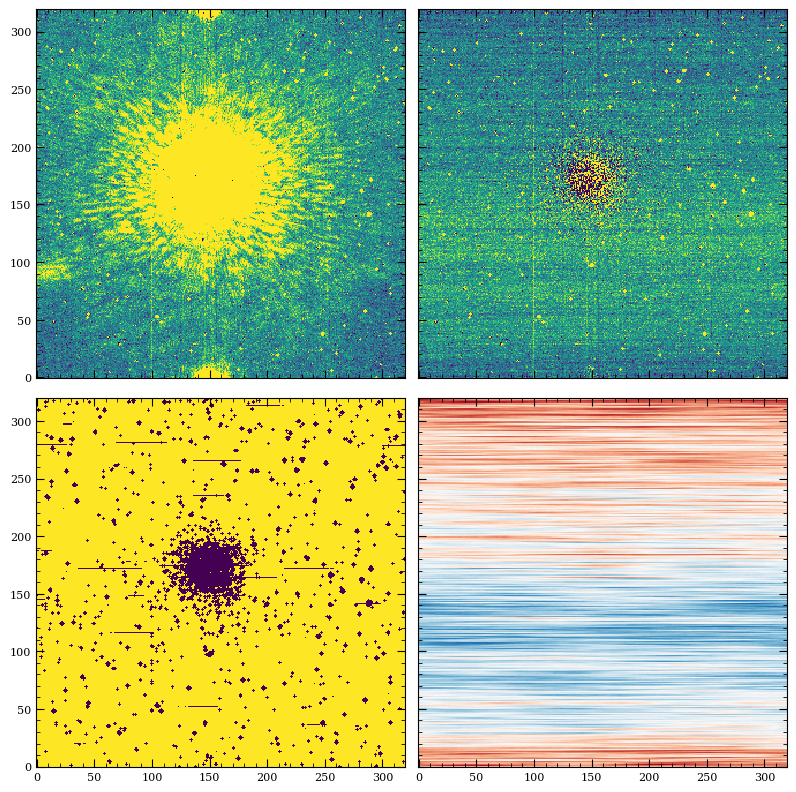

In [16]:
res2 = run_single_file(datapaths[3], output_dir, return_rateints=True,
                       remove_fnoise=True, save_results=False)

-1.121620237827301 1.526301383972168
-0.30790142714977264 0.3281382620334625
-1.1056318134069443 1.4450418502092361
-0.25653862953186035 0.24226181209087372
-1.2737921923398972 1.575601413846016
-0.43120781891047955 0.3881267476826906
-1.1608015149831772 1.411633625626564
-0.3834870904684067 0.39265792071819305


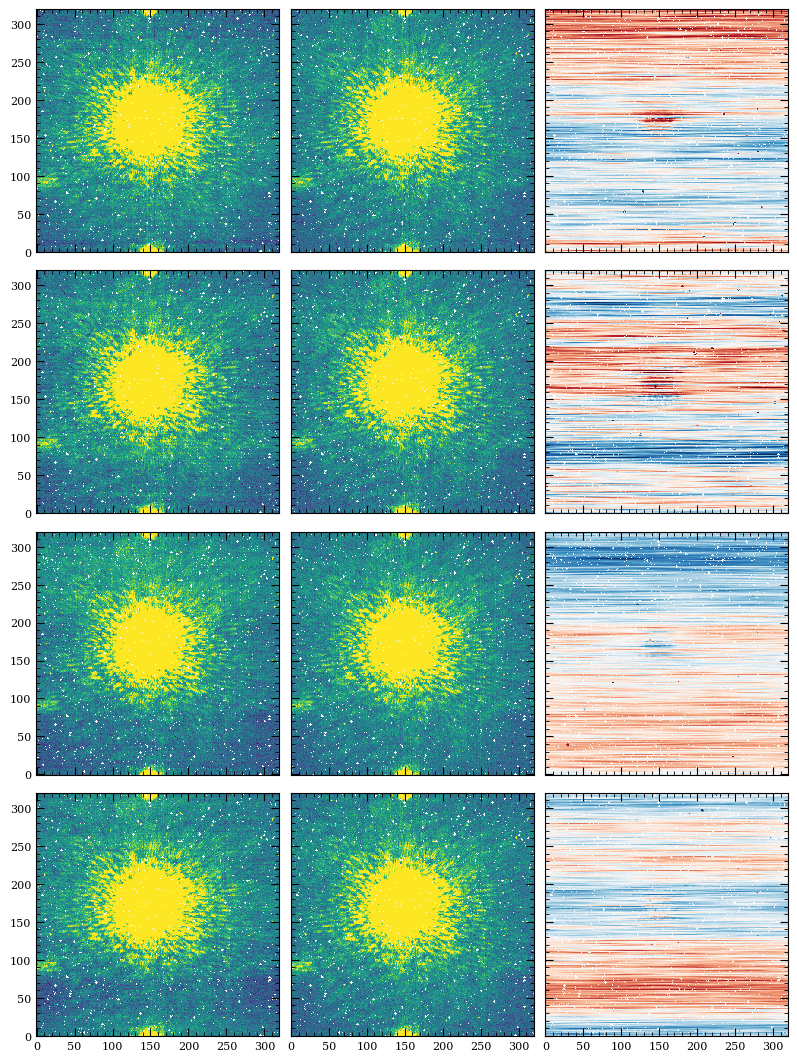

In [17]:
cube1 = res1.data
cube2 = res2.data

fig, axes_list = plt.subplots(4,3, figsize=(12/1.5,16/1.5), sharex=True, sharey=True)

for ind in range(4):

    axes = axes_list[ind]

    im1 = cube1[ind]
    im2 = cube2[ind]
    diff = im1 - im2

    im_list = [im1, im2, diff]
    cmap = [None, None, 'RdBu']
    for i, im in enumerate(im_list):
        if i==0 or i==2:
            med = np.nanmedian(im)
            sig = robust.medabsdev(im)
            vmin, vmax = np.array([-1,1])*sig*3 + med
            print(vmin, vmax)

        axes[i].imshow(im, vmin=vmin, vmax=vmax, cmap=cmap[i])

fig.tight_layout()

-0.3033231347799301 0.554155245423317
-0.3834870904684067 0.39265792071819305


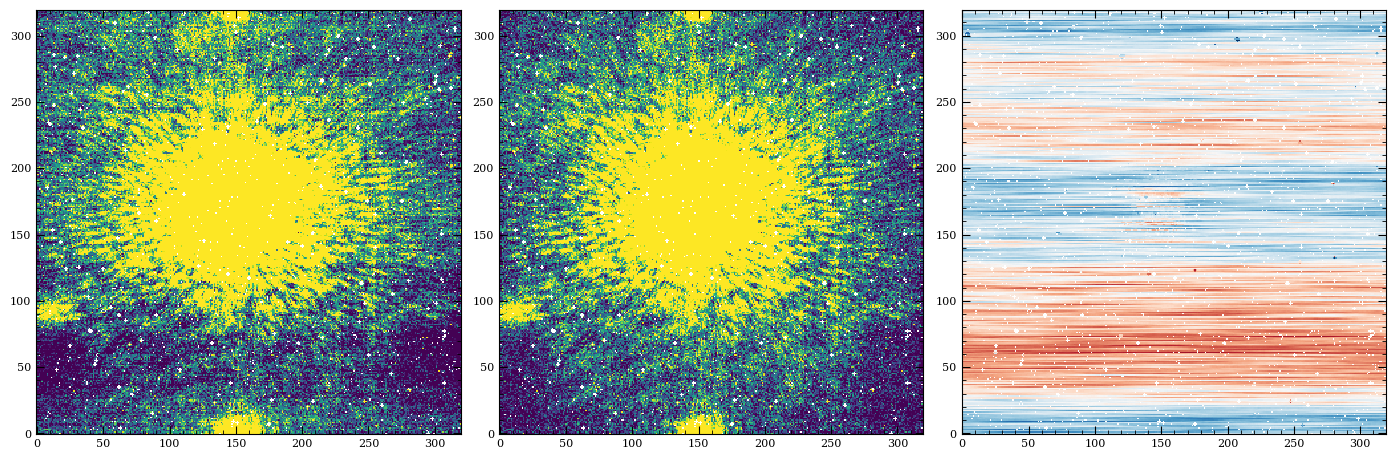

In [30]:
fig, axes = plt.subplots(1,3, figsize=(14,6))

ind = 3
im1 = res1.data[ind]
im2 = res2.data[ind]
diff = im1 - im2

im_list = [im1, im2, diff]
cmap = [None, None, 'RdBu']
for i, im in enumerate(im_list):
    if i==0 or i==2:
        med = np.nanmedian(im)
        sig = robust.medabsdev(im)
        nsig = 3 if i==2 else 1
        vmin, vmax = np.array([-1,1])*sig*nsig + med
        print(vmin, vmax)
    axes[i].imshow(im, vmin=vmin, vmax=vmax, cmap=cmap[i])

fig.tight_layout()

-1.9742807745933533 2.236215889453888
-0.8634783178567886 0.8075992316007614


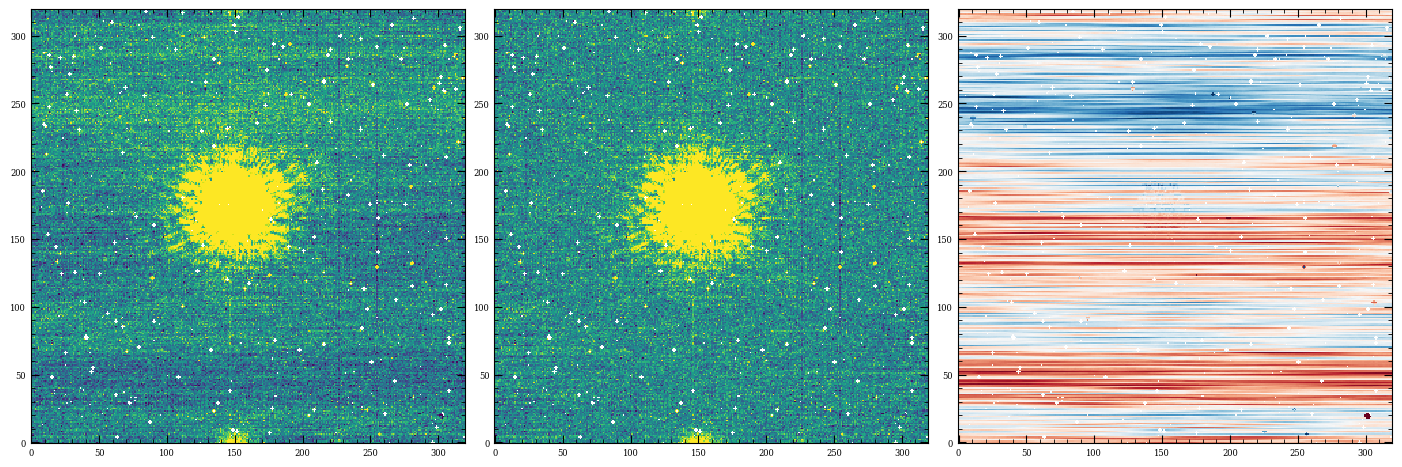

In [ ]:
from webbpsf_ext import image_manip, robust

fig, axes = plt.subplots(1,3, figsize=(14,6))

im1 = res1.data[0]
im2 = res2.data[0]
diff = im1 - im2

im_list = [im1, im2, diff]
cmap = [None, None, 'RdBu']
for i, im in enumerate(im_list):
    if i==0 or i==2:
        med = np.nanmedian(im)
        sig = robust.medabsdev(im)
        vmin, vmax = np.array([-1,1])*sig*3 + med
        print(vmin, vmax)
    axes[i].imshow(im, vmin=vmin, vmax=vmax, cmap=cmap[i])

fig.tight_layout()

In [9]:
res1.data.shape

(320, 320)

In [ ]:
db = database.Database(output_dir=output_dir)
db.verbose = True
db.read_jwst_s012_data(datapaths=datapaths,
                       psflibpaths=None,
                       bgpaths=None)

In [ ]:
# coron1pipeline.run_obs(database=Database,
#                         steps={'saturation': {'n_pix_grow_sat': 1,
#                                                 'grow_diagonal': False},
#                                 'refpix': {'odd_even_columns': True,
#                                             'odd_even_rows': True,
#                                             'nlower': 4,
#                                             'nupper': 4,
#                                             'nleft': 4,
#                                             'nright': 4,
#                                             'nrow_off': 0,
#                                             'ncol_off': 0},
#                                 'dark_current': {'skip': True},
#                                 'jump': {'rejection_threshold': 4.,
#                                         'three_group_rejection_threshold': 4.,
#                                         'four_group_rejection_threshold': 4.},
#                                 'ramp_fit': {'save_calibrated_ramp': False}},
#                         subdir='stage1')

In [ ]:
steps = {
    'ramp_fit': {'save_calibrated_ramp': True},
}

coron1pipeline.run_obs(db, steps=steps, subdir='stage1', 
                       remove_fnoise=True, verbose=False, overwrite=True)

In [ ]:
steps = {
    'ramp_fit': {'save_calibrated_ramp': True},
}

coron1pipeline.run_obs(db, steps=steps, subdir='stage1', 
                       remove_fnoise=True, verbose=False)

-1.9742807745933533 2.236215889453888
-0.8740653842687607 0.8359639197587967
-2.1800915338099003 2.114527430385351
-0.8880786597728729 0.8698157370090485
-2.4300685226917267 2.7012633979320526
-1.764556109905243 1.6995837092399597
-1.9997638165950775 2.1612153351306915
-0.919525682926178 0.9378378987312317


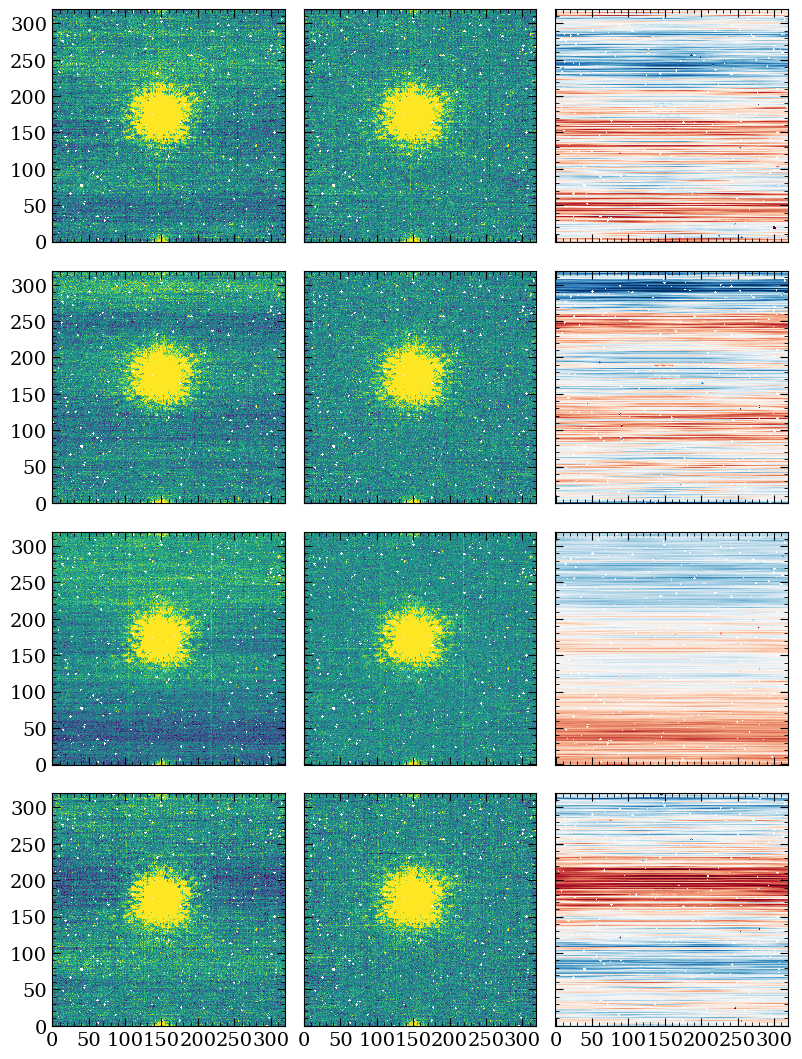

In [14]:
from astropy.io import fits
from webbpsf_ext import robust

outdir1 = '/Users/jarron/data/MAST/01386_proc/stage1_nofnoise/'
outdir2 = '/Users/jarron/data/MAST/01386_proc/stage1/'
f = 'jw01386116001_03106_00001_nrcalong_rateints.fits'
# f = 'jw01386118001_03106_00001_nrcalong_rateints.fits'

cube1 = fits.getdata(os.path.join(outdir1, f))
cube2 = fits.getdata(os.path.join(outdir2, f))

fig, axes_list = plt.subplots(4,3, figsize=(12/1.5,16/1.5), sharex=True, sharey=True)

matplotlib.rcParams.update({'font.size': 6})

for ind in range(4):

    axes = axes_list[ind]

    im1 = cube1[ind]
    im2 = cube2[ind]
    diff = im1 - im2

    im_list = [im1, im2, diff]
    cmap = [None, None, 'RdBu']
    for i, im in enumerate(im_list):
        if i==0 or i==2:
            med = np.nanmedian(im)
            sig = robust.medabsdev(im)
            vmin, vmax = np.array([-1,1])*sig*3 + med
            print(vmin, vmax)

        axes[i].imshow(im, vmin=vmin, vmax=vmax, cmap=cmap[i])

fig.tight_layout()

In [ ]:
# from spaceKLIP.fnoise_clean import CleanSubarray
# from jwst import datamodels
# from spaceKLIP.utils import expand_mask, cube_fit
# from webbpsf_ext import robust

# f = '/Users/jarron/data/MAST/01386_proc/stage1/jw01386002001_03106_00001_nrcalong_ramp.fits'
# input_model = datamodels.RampModel(f)

# data = input_model.data
# cube = data[0]
# im = cube[0].copy()

# groupdq = input_model.groupdq[0]
# bpmask_arr = np.cumsum(groupdq, axis=0) > 0


# pipe = coron1pipeline.Coron1Pipeline_spaceKLIP()
# bias_arr, slope_arr = pipe.fit_slopes(input_model)
# slope_mean = robust.mean(slope_arr, axis=0)

# mask = robust.mean(slope_mean, Cut=5, return_mask=True)
# mask = mask & ~bpmask_arr[0]
# mask = ~expand_mask(~mask, 1, grow_diagonal=True)